# 1. SQL JOIN 연습

## INNER JOIN

In [ ]:
# inner join연습
USE market_db;

SELECT * 
	FROM buy 
    INNER JOIN member 
    ON buy.mem_id = member.mem_id;

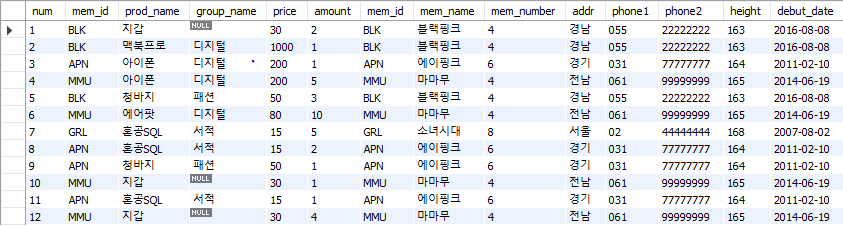

INNER JOIN을 하게 되면, 두 테이블의 공통요인조건을 통해(교집합) 테이블을 병합할 수 있다. INNER JOIN을 JOIN으로만 써도 INNER JOIN으로 인식하기 때문에 그냥 조인이라고 부르면 내부 조인을 의미한다고 알고 있으면 된다.

## OUTER JOIN

### 1. LEFT OUTER JOIN

In [ ]:
# left outer join연습
USE market_db;
SELECT * 
	FROM member 
    LEFT OUTER JOIN buy 
    ON member.mem_id = buy.mem_id;

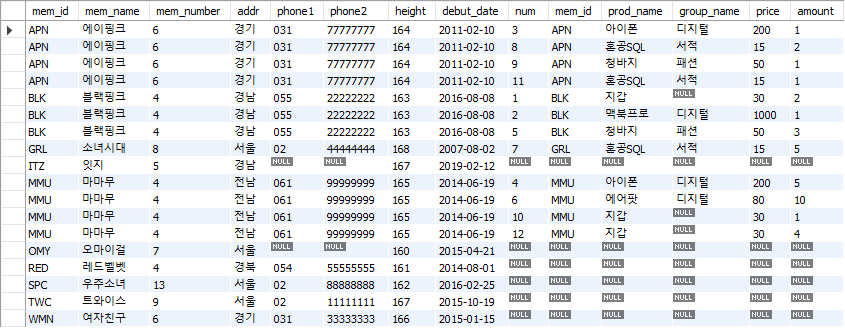

OUTER JOIN중 LEFT옵션은 왼쪽테이블 기준으로 외부조인을 시행하는 것인데 위의 테이블을 보면 알 수 있듯 member테이블의 내용은 모두 출력되고 buy테이블 중 on조건에 해당되는 값만 출력된 것을 알 수 있다.

### 2. RIGHT OUTER JOIN

In [ ]:
# right outer join연습
USE market_db;
SELECT * 
	FROM buy 
    RIGHT OUTER JOIN member 
    ON member.mem_id = buy.mem_id;

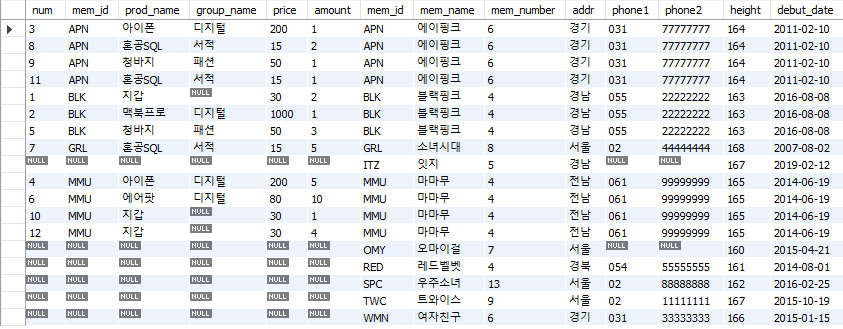

LEFT OUTER JOIN에서와 반대로 테이블위치를 바꿔서 실행해주면 위와 같이 테이블이 나타난다.

### 3. 기타 조인 방법

* **FULL OUTER JOIN**: 왼쪽 외부조인과 오른쪽 외부조인이 합쳐진 것이라고 보면 된다. 왼쪽이나 오른쪽 중 한쪽에 들어있는 내용이면 모두 출력해준다.(MySQL에서는 지원하지 않으므로, UNION으로 대체한다.)
* **CROSS JOIN**: 한쪽 테이블의 모든 행과 다른 쪽 테이블의 모든 행을 조인시키는 기능이다. 상호 조인 결과의 전체 행 개수는 두 테이블의 각 행의 개수를 곱한 수만큼 된다.
* **SELF JOIN**: 자체 조인은 자기 자신과 조인하므로 1개의 테이블을 사용한다. 별도의 문법이 있는 것은 아니고 1개로 조인하면 자체 조인이 된다.

In [ ]:
# FULL OUTER JOIN -> LEFT와 RIGHT의 UNION과 결과가 동일하다
USE market_db;
SELECT * 
	FROM member 
    LEFT OUTER JOIN buy 
    ON member.mem_id = buy.mem_id;
UNION
SELECT * 
	FROM buy 
    RIGHT OUTER JOIN member 
    ON member.mem_id = buy.mem_id;

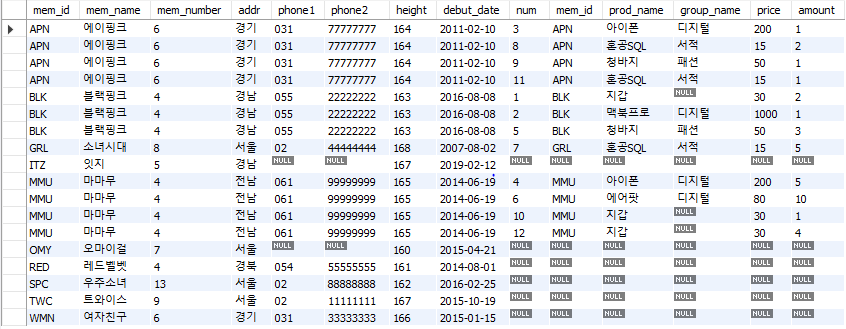

In [ ]:
# CROSS JOIN
USE market_db;
SELECT * 
	FROM buy 
    CROSS JOIN member 

참고: https://hongong.hanbit.co.kr/sql-%EA%B8%B0%EB%B3%B8-%EB%AC%B8%EB%B2%95-joininner-outer-cross-self-join/

# 2. 파이썬과 MySQL 연동하기

참고: https://hongong.hanbit.co.kr/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EA%B3%BC-mysql-%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4-%EC%97%B0%EB%8F%99%ED%95%98%EA%B8%B0-pymysql-%EB%9D%BC%EC%9D%B4%EB%B8%8C%EB%9F%AC%EB%A6%AC-%EC%84%A4/

## 네트워크 용어 정리

* DHCP: 동적으로 내부 IP주소를 할당, 정의는 '자동으로 IP (인터넷 프로토콜)를 호스트 하는 IP 주소 및 서브넷 마스크 및 기본 게이트웨이 등의 기타 관련된 구성 정보를 제공 하는 클라이언트/서버 프로토콜'이다.

## MySQL서버에서 테이블의 데이터를 python으로 가져와서 보기

In [ ]:
# 1. MySQL환경에서 스키마 만들기
DROP DATABASE IF EXISTS soloDB;
CREATE DATABASE soloDB;

# 2. solodb에 new_table2만들기
USE solodb;
CREATE TABLE new_table2(
user_id VARCHAR(5) NOT NULL,
user_name VARCHAR(15) NOT NULL,
user_email VARCHAR(20) NULL,
user_birthday DATE NULL,
PRIMARY KEY(user_id));

In [ ]:
# 3. 테이블안에 데이터 추가하기
INSERT INTO new_table2 VALUES ('1', '김태리','tlkim@gmail.com', '2018-03-01');
INSERT INTO new_table2 VALUES ('2', '이병헌','bhlee@gmail.com', '2012-04-15');
INSERT INTO new_table2 VALUES ('3', '송중기','jgsong@gmail.com', '2019-01-01');
INSERT INTO new_table2 VALUES ('4', '송혜교','hksong@gmail.com', '2013-11-01');

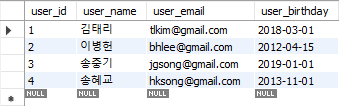

MySQL환경에서 new_table이 생성되고, 데이터가 잘 들어갔는지 확인 후 python에서 sql데이터를 불러내 본다.

In [3]:
# sql테이블에서 데이터를 불러와서 python에서 보기
import pymysql

# 전역변수 선언
con, cur = None, None
data1, data2, data3, data4 = "", "", "", ""
row = None

# 메인 코드
conn = pymysql.connect(host='127.0.0.1', user='root', password='970ejqmfdh!', db='soloDB', charset='utf8')
cur = conn.cursor()
# new_table2의 데이터 읽어오기
cur.execute("SELECT * FROM new_table2")

print("사용자ID             사용자이름          이메일            출생년도")
print("-------------------------------------------------------------------")

while True:
    # 한줄만큼의 데이터를 읽어와서 row에 저장
    row = cur.fetchone()
    # print(row)
    # break
    if row== None :
        break
    # print(row)
    data1 = row[0]
    data2 = row[1]
    data3 = row[2]
    data4 = row[3]
    print("%5s   %15s   %20s   %s" % (data1, data2, data3, data4))

conn.close()

사용자ID             사용자이름          이메일            출생년도
-------------------------------------------------------------------
    1               김태리        tlkim@gmail.com   2018-03-01
    2               이병헌        bhlee@gmail.com   2012-04-15
    3               송중기       jgsong@gmail.com   2019-01-01
    4               송혜교       hksong@gmail.com   2013-11-01


sql에 저장된 데이터가 올바르게 출력되는것을 알 수 있다.

## Python에서 데이터를 입력하여 MySQL서버에서 결과보기

이번에는 앞에서 해온 역순을 진행해 보려 한다.

In [4]:
# 파이썬에서 sql로 데이터 올리기
import pymysql
from datetime import datetime

# 전역변수 선언
conn, cur = None, None
data1, data2, data3, data4 = "", "", "", ""
sql = ""

# 메인 코드
# 마찬가지로 password는 개인의 MySQL 비밀번호를 사용해야 한다
conn = pymysql.connect(host='127.0.0.1', user='root', password='970ejqmfdh!', db='soloDB', charset='utf8')
cur  = conn.cursor()

while True:
    data1 = input('사용자 ID: ')
    if data1 == "":
        break
    data2 = input('사용자 이름: ')
    data3 = input('사용자 이메일: ')
    data4 = input('사용자 출생연도: ')
    birthday = datetime.strptime(data4, '%Y-%m-%d')
    birthday = "{0:4d}-{1:02d}-{2:02d}".format(birthday.year, birthday.month, birthday.day)
    # new_table2에 적용하기
    # birthday의 문자열 인식을 위해 앞뒤에 ''를 추가해준다
    sql = "INSERT INTO new_table2 VALUES('" + data1 + "','" + data2 + "','" + data3 + "','" + birthday + "')"
    print(sql)
    cur.execute(sql)

conn.commit()
conn.close()

사용자 ID: 6
사용자 이름: gong
사용자 이메일: ghjdd@gmail.com
사용자 출생연도: 2004-11-21
INSERT INTO new_table2 VALUES('6','gong','ghjdd@gmail.com','2004-11-21')
사용자 ID: 


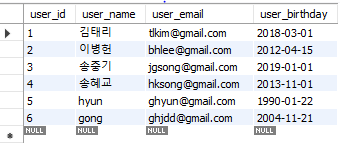

확인차 Pycharm환경에서 한번 실행해보고, 문제가 없다 판단되어 Jupyter notebook환경에서도 실행하여 데이터 2행이 추가되었다.

#### 데이터타입의 변경 흐름

|python| SQL |python|
|----|----|----|
|data1(str)|VARCHAR(5)|str|
|data2(str)|VARCHAR(15)|str|
|data3(str)|VARCHAR(20)|str|
|data4(str)|DATE|datetime.date|

## 함수화 해보기

(추가)csv파일 5줄 데이터를 읽어서 storeDB함수로 데이터베이스에 입력 -> 파일 읽는 함수

python으로 mysql에 문자열을 입력하면, 함수로 mysql 데이터베이스에 저장

def storeDB(DB명, 테이블명, '1','이름','이메일','생년월일')

함수로 mysql에 접근해서 데이터를 읽어서 출력

def readDB(DB명, 테이블명)

In [ ]:
# 파이썬에서 sql서버로 데이터 보내기
import pymysql
from datetime import datetime

# 전역변수 선언
conn, cur = None, None
data1, data2, data3, data4 = "", "", "", ""
sql = ""
def storeDB(database, table):
    conn = pymysql.connect(host='127.0.0.1', user='root', password='970ejqmfdh!', db=database, charset='utf8')
    cur = conn.cursor()

    while True:
        data1 = input('사용자 ID: ')
        if data1 == "":
            break
        data2 = input('사용자 이름: ')
        data3 = input('사용자 이메일: ')
        data4 = input('사용자 출생년도: ')
        birthday = datetime.strptime(data4, '%Y-%m-%d')
        birthday = "{0:4d}-{1:02d}-{2:02d}".format(birthday.year, birthday.month, birthday.day)

        sql = "INSERT INTO " + "{}".format(table) +" VALUES('" + data1 + "','" + data2 + "','" + data3+ "','" + birthday + "')"
        print(sql)
        cur.execute(sql)
    conn.commit()
    conn.close()
database = input('데이터베이스 입력: ')
table = input('테이블 입력: ')
print(storeDB(database, table))

In [ ]:
# sql서버에서 파이썬으로 데이터 확인하기
import pymysql

# 전역변수 선언
con, cur = None, None
data1, data2, data3, data4 = "", "", "", ""
row = None
def readDB(database, table):

    conn = pymysql.connect(host='127.0.0.1', user='root', password='970ejqmfdh!', db=database, charset='utf8')
    cur = conn.cursor()
    cur.execute("SELECT * FROM " + "{}".format(table))

    print("사용자ID             사용자이름          이메일            출생년도")
    print("-------------------------------------------------------------------")

    while True:
        row = cur.fetchone()
        # print(row)
        # break
        if row== None :
            break
        # print(row)
        data1 = row[0]
        data2 = row[1]
        data3 = row[2]
        data4 = row[3]
        print("%5s   %15s   %20s   %s" % (data1, data2, data3, data4))

    conn.close()

database = input('데이터베이스 입력: ')
table = input('테이블 입력: ')
print(readDB(database, table))